# Projet réduction de dimensionnalité et techniques de clustering - Projet 3
## 1. Création des demi-lunes

In [13]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_moons

data, category = make_moons(n_samples=100, noise=0.1, random_state=42)
moons = pd.DataFrame(data, columns=['x', 'y'])
moons['class']=category
moons.head()

,x,y,class
0,1.582023,-0.445815,1
1,0.066045,0.439207,1
2,0.736631,-0.398963,1
3,-1.056928,0.242456,0
4,-0.802162,0.202718,0


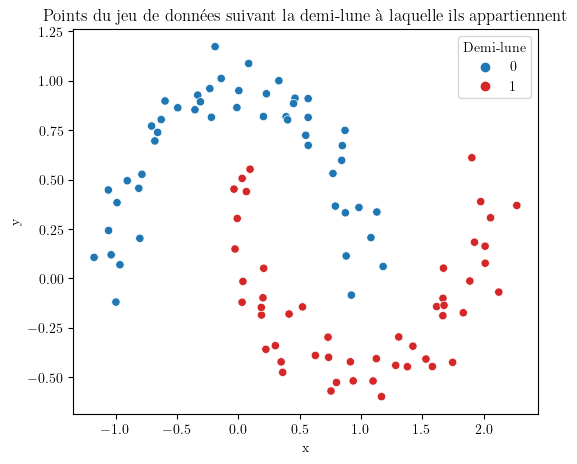

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
# Changement de police des graphiques
plt.rc('font', family = 'serif', serif = 'cmr10')
plt.rcParams.update({"text.usetex": True, "axes.formatter.use_mathtext" : True})

fig, ax = plt. subplots(figsize=(6,5))
sns.scatterplot(data=moons, x='x', y='y', hue='class', palette=["tab:blue", "tab:red"])

plt.title("Points du jeu de données suivant la demi-lune à laquelle ils appartiennent")
plt.legend(title="Demi-lune")
plt.show()

## 2. Clustering

### 2.1. Kmeans

Nous savons ici qu'il y a deux groupes de données. Nous pouvons donc demander à l'algorithme KMeans de former deux clusters.

In [19]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, n_init=50)
kmeans.fit(moons[['x','y']])

moons['cluster_kmeans'] = kmeans.labels_
moons.head()

,x,y,class,clusters_kmeans
0,1.582023,-0.445815,1,1
1,0.066045,0.439207,1,0
2,0.736631,-0.398963,1,1
3,-1.056928,0.242456,0,0
4,-0.802162,0.202718,0,0


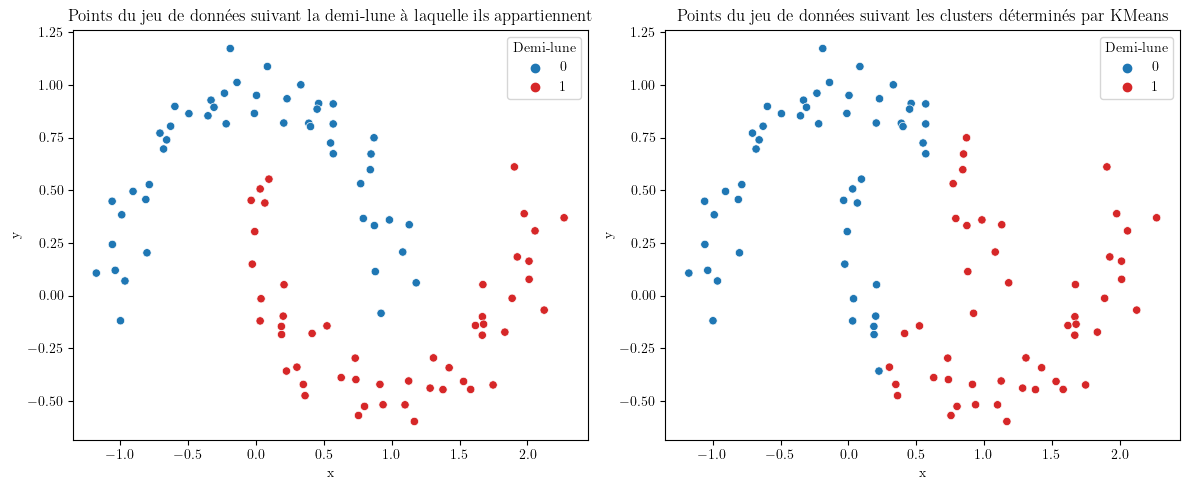

In [26]:
fig, (ax1, ax2) = plt. subplots(1,2,figsize=(12,5))

# Groupement par demi-lune
sns.scatterplot(data=moons, x='x', y='y', hue='class', palette=["tab:blue", "tab:red"], ax=ax1)
ax1.set_title("Points du jeu de données suivant la demi-lune à laquelle ils appartiennent")
ax1.legend(title="Demi-lune")

# Clusters du KMeans
sns.scatterplot(data=moons, x='x', y='y', hue='cluster_kmeans', palette=["tab:blue", "tab:red"], ax=ax2)
ax2.set_title("Points du jeu de données suivant les clusters déterminés par KMeans")
ax2.legend(title="Demi-lune")

plt.tight_layout()
plt.show()

Comme on pouvait s'y attendre, on remarque que l'algorithme KMeans n'a pas créé des clusters correspondant aux demi-lunes. Il a en effet tendance à créer des clusters de forme sphérique.

### 2.2 Classification Ascendante Hiérarchique

In [29]:
from scipy.cluster.hierarchy import linkage, dendrogram

mergings = linkage(moons[['x','y']], method='complete')

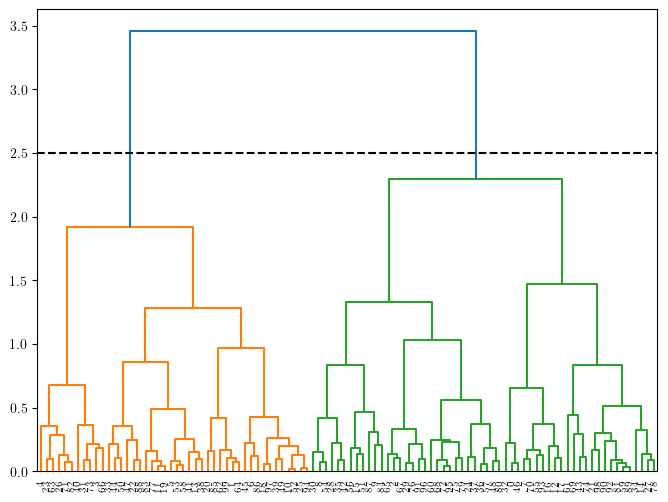

In [30]:
fig, ax = plt.subplots(figsize=(8,6))
dendrogram(mergings, labels=[i for i in range(len(X))] , leaf_font_size=7)
plt.axhline(2.5, color='black', linestyle='--')
plt.show()

Pour constituer deux clusters, on peut opérer la coupe à une hauteur égale à 2.5.

In [31]:
from scipy.cluster.hierarchy import fcluster

clusters_cah = fcluster(mergings, t=2.5, criterion='distance')
moons['cluster_cah'] = clusters_cah
moons.head()

,x,y,class,clusters_kmeans,cluster_cah
0,1.582023,-0.445815,1,1,2
1,0.066045,0.439207,1,0,1
2,0.736631,-0.398963,1,1,2
3,-1.056928,0.242456,0,0,1
4,-0.802162,0.202718,0,0,1


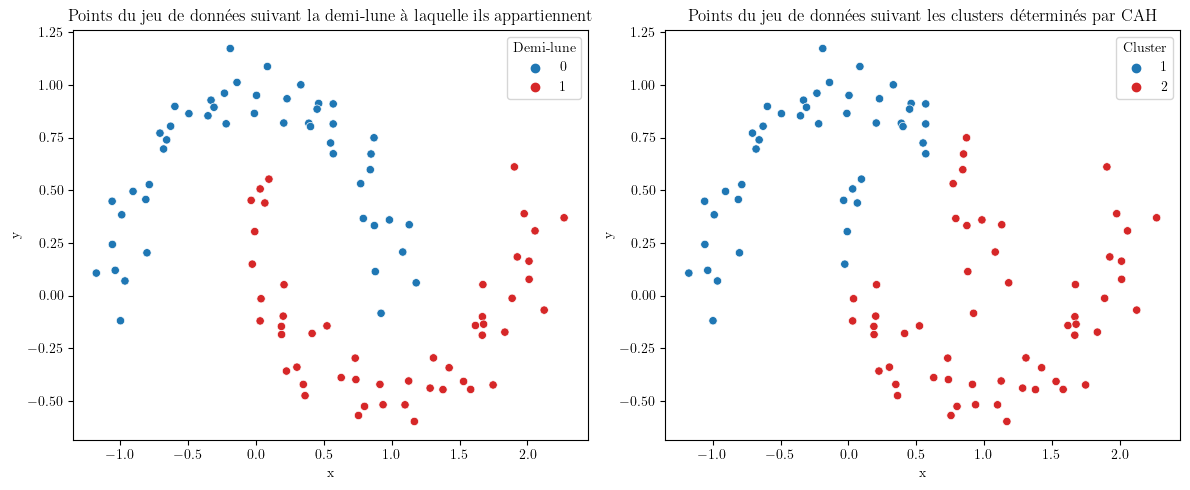

In [79]:
fig, (ax1, ax2) = plt. subplots(1,2,figsize=(12,5))

# Groupement par demi-lune
sns.scatterplot(data=moons, x='x', y='y', hue='class', palette=["tab:blue", "tab:red"], ax=ax1)
ax1.set_title("Points du jeu de données suivant la demi-lune à laquelle ils appartiennent")
ax1.legend(title="Demi-lune")

# Clusters de la CAH
sns.scatterplot(data=moons, x='x', y='y', hue='cluster_cah', palette=["tab:blue", "tab:red"], ax=ax2)
ax2.set_title("Points du jeu de données suivant les clusters déterminés par CAH")
ax2.legend(title="Cluster")

plt.tight_layout()
plt.show()

Les clusters déterminés par CAH ne correspondent pas non plus aux demi-lunes. Cette méthode forme également des clusters de forme sphérique.

### 2.3 DBSCAN

In [74]:
from sklearn.cluster import DBSCAN

clusters = DBSCAN(eps = 0.28, min_samples = 4).fit(moons[['x','y']])

In [75]:
moons['cluster_dbscan'] = clusters.labels_
moons.head()

,x,y,class,clusters_kmeans,cluster_cah,cluster_dbscan
0,1.582023,-0.445815,1,1,2,0
1,0.066045,0.439207,1,0,1,0
2,0.736631,-0.398963,1,1,2,0
3,-1.056928,0.242456,0,0,1,1
4,-0.802162,0.202718,0,0,1,1


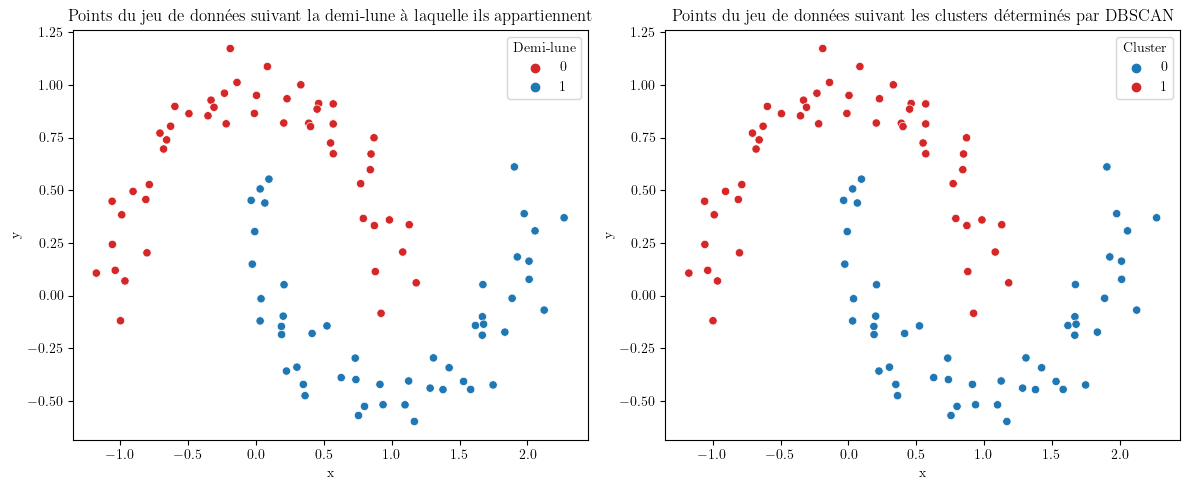

In [80]:
fig, (ax1, ax2) = plt. subplots(1,2,figsize=(12,5))

# Groupement par demi-lune
sns.scatterplot(data=moons, x='x', y='y', hue='class', palette=["tab:red", "tab:blue"], ax=ax1)
ax1.set_title("Points du jeu de données suivant la demi-lune à laquelle ils appartiennent")
ax1.legend(title="Demi-lune")

# Clusters du DBSCAN
sns.scatterplot(data=moons, x='x', y='y', hue='cluster_dbscan', palette=["tab:blue", "tab:red"], ax=ax2)
ax2.set_title("Points du jeu de données suivant les clusters déterminés par DBSCAN")
ax2.legend(title="Cluster")

plt.tight_layout()
plt.show()

L'algorithme DBSCAN est capable de créer des clusters non sphériques. Il se base sur la densité des points. Cependant, il faut régler le rayon de voisinnage $\epsilon$ d'un point de données, ce qui est assez délicat. Ici, il m'a fallu plusieurs essais pour trouver la valeur permettant d'obtenir les clusters en forme de demi-lunes. Il faut aussi déterminer le nombre minimal de points à l'intérieur du voisinnage d'un point de données pour former un cluster. 